## 3: FIRST ALGORITHM - WHEN WILL THEY SHOP?


1. build grid: when do/dont they shop, how many times, on which day...
2. define priliminaries for algorithm
3. define filters for algorithm
4. RUN algorithm 


----


Outcome (example):
1. input: Wednesday
2. output: TRUE, 1x

Outcome pt. 2 (example):
1. input: 12:45 (time)
2. output: noon, TRUE

or

1. input: 19:34 (time)
2. output: evening, FALSE

### Import libraries 

In [1]:
# %matplotlib notebook
%matplotlib inline
#Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
import dataframe_image as dfi
from datetime import time
import matplotlib.dates as mdates
from matplotlib.ticker import StrMethodFormatter
from matplotlib.pyplot import figure



from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree

In [2]:
# importing the required function
from scipy.stats import chi2_contingency

### Load and view data 

In [3]:
df = pd.read_csv (r"C:\Users\20204113\OneDrive - TU Eindhoven\2_Research\1_Groceries\DATA\9th week - narrative (3rd attempt)\HH2\df\df_HH2.csv")

# del df["HH"]
# df.describe(include='all')

In [52]:
# use the corr function to display the correlation between all the features
data_corr = df.corr()
# data_corr

In [5]:
# df_count = df[['order_ID','store_name', 'day']]
# df_count = df_count.drop_duplicates()
# df_count = df_count.drop(columns=['order_ID'])
# df_count.head()

-
# 1. Where?

## ALL ORDERS

### check correlation per store TYPE

In [6]:
df_orders = df[['order_ID', 'store_name', 'storename_num', 'store_type', 'storetype_num','day', 'day_num', 'time', 'time_num', 'timestamp', 'times', 'dates', 'times_min', 'dates_days', 'order_amount', 'order_price']]
df_orders = df_orders.drop_duplicates()

In [7]:
# Cross tabulation between DAY and STORE TYPE
CrosstabResult=pd.crosstab(index=df_orders['store_type'],columns=df_orders['day'])
CrosstabResult

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
store_type,,,,,,,
bakery,0,1,3,5,0,2,1
butcher,0,1,1,1,1,0,0
drugstore,0,0,0,0,0,1,0
furniture store,1,0,0,0,0,0,0
supermarket,2,4,3,3,4,2,4


In [8]:
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)

# P-Value is the Probability of H0 being True
# If P-Value > 0.05 then only we Accept the assumption(H0)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.20212640487695582


Not significant, let's get more specific:

### check correlation per store NAME

In [9]:
# Cross tabulation between DAY and STORE NAME
CrosstabResult=pd.crosstab(index=df_orders['store_name'],columns=df_orders['day'])
CrosstabResult

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
store_name,,,,,,,
Albert Heijn,1,4,0,1,2,0,4
Brabo,0,0,0,0,1,0,0
Carrefour,0,0,1,0,0,0,0
Delhaize,1,0,0,2,0,0,0
Ikea,1,0,0,0,0,0,0
Kruidvat,0,0,0,0,0,1,0
Okay,0,0,2,0,2,2,0
Sys,0,1,3,5,0,2,1
Versavel Poelman,0,1,1,1,0,0,0


In [10]:
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)

# P-Value is the Probability of H0 being True
# If P-Value > 0.05 then only we Accept the assumption(H0)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.03865973858951397


This p-value is low enough to be a significant correlation!
> e.g.: if it's Wednesday, they will probably go shopping at Albert Heijn

## Visualize stores per day (ALL)

In [11]:
df_nunique = df.groupby(['day', 'store_name'])['order_ID'].nunique()
df_nunique = pd.DataFrame (df_nunique)
df_nunique = df_nunique.reset_index()
df_nunique = df_nunique.loc[~(df_nunique==0).any(axis=1)]

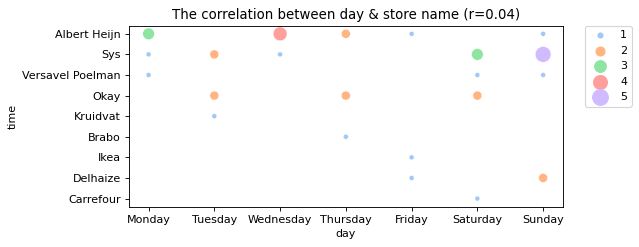

In [12]:
#order x and y axis chronologically
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_nunique['day'] = pd.Categorical(df_nunique['day'], order)
df_nunique.sort_values(by=['day'], inplace=True)


# select the x and y features
x = df_nunique['day']# select the x feature
y = df_nunique['store_name']# select the y feature

# select the feature that decides the colors
colors = df_nunique['order_ID'] # select the color column

# select the feature that will decide the size of the circle (and divide the value by 1000 for reshaping in the plot)
size = df_nunique['order_ID'] # select the column for the size and divide it by 1000 (/ 1000)

# fit the points with the scatter function
figure(figsize=(7, 3), dpi=80)
sns.scatterplot(x=x, y=y, palette="pastel", hue=colors, size=size, sizes=(20,200))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#repeat ChiSq value
current_corr = round(ChiSqResult[1], 2)

# give the graph a title and labels
plt.xlabel("day")
plt.ylabel('time')
plt.title(f"The correlation between day & store name (r={current_corr})")

# call the graph (show function)
plt.grid(False)
plt.show()

We now have our first two givens:
> 1. It is <b>day X</b>
2. The HH will shop at <b>store name X</b>

#### Can we also say at which time they may go to this store on this day?

# 2. DAY vs TIME (all orders)

In [13]:
df_orders = df[['order_ID', 'store_name', 'storename_num', 'store_type', 'storetype_num','day', 'day_num', 'time', 'time_num', 'timestamp', 'times', 'dates', 'times_min', 'dates_days', 'order_amount', 'order_price']]
df_orders = df_orders.drop_duplicates()

In [14]:
# Cross tabulation between DAY and TIME
CrosstabResult=pd.crosstab(index=df_orders['time'],columns=df_orders['day'])
print(CrosstabResult)


# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)

# P-Value is the Probability of H0 being True
# If P-Value > 0.05 then only we Accept the assumption(H0)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

day        Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
time                                                                     
afternoon       1       0         1       0         2        1          0
evening         0       1         1       0         1        0          0
morning         1       2         5       9         1        2          2
noon            1       3         0       0         1        2          3
The P-Value of the ChiSq Test is: 0.1226046357444237


In [15]:
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Assumption(H0) is that day and times are NOT correlated
 
# Finds out the Prices data for each FuelType as a list
CategoryGroupLists=df_orders.groupby('day')['times_min'].apply(list)
 
# Performing the ANOVA test
# We reject the Assumption(H0) only when P-Value < 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  0.07923696121350002


In [16]:
#Let's try afternoon and evening as one group
df_orders['time'] = df_orders['time'].replace(['afternoon', 'evening'], 'afternoon')

In [17]:
# Cross tabulation between DAY and TIME
CrosstabResult=pd.crosstab(index=df_orders['time'],columns=df_orders['day'])
print(CrosstabResult)

# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)

# P-Value is the Probability of H0 being True
# If P-Value > 0.05 then only we Accept the assumption(H0)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

day        Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
time                                                                     
afternoon       1       1         2       0         3        1          0
morning         1       2         5       9         1        2          2
noon            1       3         0       0         1        2          3
The P-Value of the ChiSq Test is: 0.03936988225203821


#### They go to (any) store on X day => at X time

We now have our first THREE givens:
> 1. It is <b>day X</b>
    1. The HH will shop at <b>store name X</b>
    2. The HH will shop at <b>time X</b>

# 3.1 STORE VS DAY @ SPECIFIED TIME

### check correlation per store TYPE

In [18]:
df_orders = df[['order_ID', 'store_name', 'storename_num', 'store_type', 'storetype_num','day', 'day_num', 'time', 'time_num', 'timestamp', 'times', 'dates', 'times_min', 'dates_days', 'order_amount', 'order_price']]
df_orders = df_orders.drop_duplicates()

#Let's try afternoon and evening as one group
df_orders['time'] = df_orders['time'].replace(['afternoon', 'evening'], 'afternoon')
# df_orders['time'] = df_orders['time'].replace(['noon', 'morning'], 'morning')

In [19]:
# to select only one
time1 = 'morning'
time2 = 'noon'
time3 = 'afternoon'

# select only these data for the df
df_time1 = df_orders[df_orders['time'] == time1]
df_time2 = df_orders[df_orders['time'] == time2]
df_time3 = df_orders[df_orders['time'] == time3]

In [20]:
# Cross tabulation between DAY and STORE TYPE
CrosstabResult1=pd.crosstab(index=df_time1['store_type'],columns=df_time1['day'])
CrosstabResult2=pd.crosstab(index=df_time2['store_type'],columns=df_time2['day'])
CrosstabResult3=pd.crosstab(index=df_time3['store_type'],columns=df_time3['day'])
CrosstabResult3

day,Friday,Monday,Saturday,Thursday,Tuesday
store_type,,,,,
butcher,0,0,0,1,0
drugstore,0,0,0,0,1
supermarket,1,1,2,2,0


In [21]:
# Performing Chi-sq test
ChiSqResult1 = chi2_contingency(CrosstabResult1)
ChiSqResult2 = chi2_contingency(CrosstabResult2)
ChiSqResult3 = chi2_contingency(CrosstabResult3)

# P-Value is the Probability of H0 being True
# If P-Value > 0.05 then only we Accept the assumption(H0)

print('The P-Value of the ChiSq Test is:', ChiSqResult1[1])
print('The P-Value of the ChiSq Test is:', ChiSqResult2[1])
print('The P-Value of the ChiSq Test is:', ChiSqResult3[1])

The P-Value of the ChiSq Test is: 0.059649277097061276
The P-Value of the ChiSq Test is: 0.3491858526038865
The P-Value of the ChiSq Test is: 0.2809707836080619


### check correlation per store NAME

In [22]:
# to select only one
time1 = 'morning'
time2 = 'noon'
time3 = 'afternoon'

# select only these data for the df
df_time1 = df_orders[df_orders['time'] == time1]
df_time2 = df_orders[df_orders['time'] == time2]
df_time3 = df_orders[df_orders['time'] == time3]

In [23]:
# Cross tabulation between DAY and STORE TYPE
CrosstabResult1=pd.crosstab(index=df_time1['store_name'],columns=df_time1['day'])
CrosstabResult2=pd.crosstab(index=df_time2['store_name'],columns=df_time2['day'])
CrosstabResult3=pd.crosstab(index=df_time3['store_name'],columns=df_time3['day'])
CrosstabResult1

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
store_name,,,,,,,
Albert Heijn,0,0,0,1,1,0,1
Delhaize,0,0,0,2,0,0,0
Ikea,1,0,0,0,0,0,0
Okay,0,0,1,0,0,1,0
Sys,0,1,3,5,0,1,1
Versavel Poelman,0,1,1,1,0,0,0


In [24]:
# Performing Chi-sq test
ChiSqResult1 = chi2_contingency(CrosstabResult1)
ChiSqResult2 = chi2_contingency(CrosstabResult2)
ChiSqResult3 = chi2_contingency(CrosstabResult3)

# P-Value is the Probability of H0 being True
# If P-Value > 0.05 then only we Accept the assumption(H0)

print('The P-Value of the ChiSq Test is:', ChiSqResult1[1])
print('The P-Value of the ChiSq Test is:', ChiSqResult2[1])
print('The P-Value of the ChiSq Test is:', ChiSqResult3[1])

The P-Value of the ChiSq Test is: 0.0647121144829477
The P-Value of the ChiSq Test is: 0.26502591529736164
The P-Value of the ChiSq Test is: 0.12034480882747386


-

# 3.2 TIME VS DAY @ SPECIFIED STORE

In [25]:
df = pd.read_csv (r"C:\Users\20204113\OneDrive - TU Eindhoven\2_Research\1_Groceries\DATA\9th week - narrative (3rd attempt)\HH2\df\df_HH2.csv")

df_orders = df[['order_ID', 'store_name', 'storename_num', 'store_type', 'storetype_num','day', 'day_num', 'time', 'time_num', 'timestamp', 'times', 'dates', 'times_min', 'dates_days', 'order_amount', 'order_price']]
df_orders = df_orders.drop_duplicates()

#### Now that we know which store, we select the correct store

In [26]:
# to select only one
store1 = 'Albert Heijn'
store2 = 'Sys'
store3 = 'Okay'
store4 = 'Delhaize'
store5 = 'Versavel Poelman'
store6 = 'Kruidvat'
store7 = 'Brabo'
store8 = 'Ikea'
store9 = 'Carrefour'

# select only these data for the df
df_store1 = df_orders[df_orders['store_name'] == store1]
df_store2 = df_orders[df_orders['store_name'] == store2]
df_store3 = df_orders[df_orders['store_name'] == store3]
df_store4 = df_orders[df_orders['store_name'] == store4]
df_store5 = df_orders[df_orders['store_name'] == store5]
df_store6 = df_orders[df_orders['store_name'] == store6]
df_store7 = df_orders[df_orders['store_name'] == store7]
df_store8 = df_orders[df_orders['store_name'] == store8]
df_store9 = df_orders[df_orders['store_name'] == store9]

In [27]:
# Cross tabulation between DAY and TIME
CrosstabResult1=pd.crosstab(index=df_store1['time'],columns=df_store1['day'])
CrosstabResult2=pd.crosstab(index=df_store2['time'],columns=df_store2['day'])
CrosstabResult3=pd.crosstab(index=df_store3['time'],columns=df_store3['day'])
CrosstabResult4=pd.crosstab(index=df_store4['time'],columns=df_store4['day'])
CrosstabResult5=pd.crosstab(index=df_store5['time'],columns=df_store5['day'])
CrosstabResult6=pd.crosstab(index=df_store6['time'],columns=df_store6['day'])
CrosstabResult7=pd.crosstab(index=df_store7['time'],columns=df_store7['day'])
CrosstabResult8=pd.crosstab(index=df_store8['time'],columns=df_store8['day'])
CrosstabResult9=pd.crosstab(index=df_store9['time'],columns=df_store9['day'])
CrosstabResult3

day,Saturday,Thursday,Tuesday
time,,,
afternoon,1,1,0
evening,0,1,0
morning,1,0,1
noon,0,0,1


In [28]:
# Performing Chi-sq test
ChiSqResult1 = chi2_contingency(CrosstabResult1)
ChiSqResult2 = chi2_contingency(CrosstabResult2)
ChiSqResult3 = chi2_contingency(CrosstabResult3)
ChiSqResult4 = chi2_contingency(CrosstabResult4)
ChiSqResult5 = chi2_contingency(CrosstabResult5)
ChiSqResult6 = chi2_contingency(CrosstabResult6)
ChiSqResult7 = chi2_contingency(CrosstabResult7)
ChiSqResult8 = chi2_contingency(CrosstabResult8)
ChiSqResult9 = chi2_contingency(CrosstabResult9)

# P-Value is the Probability of H0 being True
# If P-Value > 0.05 then only we Accept the assumption(H0)

print('The P-Value of the ChiSq Test 1 is:', ChiSqResult1[1])
print('The P-Value of the ChiSq Test 2 is:', ChiSqResult2[1])
print('The P-Value of the ChiSq Test 3 is:', ChiSqResult3[1])
print('The P-Value of the ChiSq Test 4 is:', ChiSqResult4[1])
print('The P-Value of the ChiSq Test 5 is:', ChiSqResult5[1])
print('The P-Value of the ChiSq Test 6 is:', ChiSqResult6[1])
print('The P-Value of the ChiSq Test 7 is:', ChiSqResult7[1])
print('The P-Value of the ChiSq Test 8 is:', ChiSqResult8[1])
print('The P-Value of the ChiSq Test 9 is:', ChiSqResult9[1])

The P-Value of the ChiSq Test 1 is: 0.536632667900785
The P-Value of the ChiSq Test 2 is: 0.2437539574931151
The P-Value of the ChiSq Test 3 is: 0.4231900811268435
The P-Value of the ChiSq Test 4 is: 0.6650055421020291
The P-Value of the ChiSq Test 5 is: 1.0
The P-Value of the ChiSq Test 6 is: 1.0
The P-Value of the ChiSq Test 7 is: 1.0
The P-Value of the ChiSq Test 8 is: 1.0
The P-Value of the ChiSq Test 9 is: 1.0


#### Let's try store type

In [29]:
# to select only one
storet1 = 'supermarket'
storet2 = 'butcher'
storet3 = 'bakery'
storet4 = 'drugstore'
storet5 = 'furniture store'

# select only these data for the df
df_storet1 = df_orders[df_orders['store_type'] == storet1]
df_storet2 = df_orders[df_orders['store_type'] == storet2]
df_storet3 = df_orders[df_orders['store_type'] == storet3]
df_storet4 = df_orders[df_orders['store_type'] == storet4]
df_storet5 = df_orders[df_orders['store_type'] == storet5]

In [30]:
# Cross tabulation between DAY and TIME
CrosstabResult1=pd.crosstab(index=df_storet1['time'],columns=df_storet1['day'])
CrosstabResult2=pd.crosstab(index=df_storet2['time'],columns=df_storet2['day'])
CrosstabResult3=pd.crosstab(index=df_storet3['time'],columns=df_storet3['day'])
CrosstabResult4=pd.crosstab(index=df_storet4['time'],columns=df_storet4['day'])
CrosstabResult5=pd.crosstab(index=df_storet5['time'],columns=df_storet5['day'])
CrosstabResult1

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
time,,,,,,,
afternoon,1,0,1,0,1,0,0
evening,0,1,1,0,1,0,0
morning,0,0,1,3,1,1,1
noon,1,3,0,0,1,1,3


In [31]:
# Performing Chi-sq test
ChiSqResult1 = chi2_contingency(CrosstabResult1)
ChiSqResult2 = chi2_contingency(CrosstabResult2)
ChiSqResult3 = chi2_contingency(CrosstabResult3)
ChiSqResult4 = chi2_contingency(CrosstabResult4)
ChiSqResult5 = chi2_contingency(CrosstabResult5)


# P-Value is the Probability of H0 being True
# If P-Value > 0.05 then only we Accept the assumption(H0)

print('The P-Value of the ChiSq Test 1 is:', ChiSqResult1[1])
print('The P-Value of the ChiSq Test 2 is:', ChiSqResult2[1])
print('The P-Value of the ChiSq Test 3 is:', ChiSqResult3[1])
print('The P-Value of the ChiSq Test 4 is:', ChiSqResult4[1])
print('The P-Value of the ChiSq Test 5 is:', ChiSqResult5[1])

The P-Value of the ChiSq Test 1 is: 0.3482146508127832
The P-Value of the ChiSq Test 2 is: 0.26146412994911117
The P-Value of the ChiSq Test 3 is: 0.2437539574931151
The P-Value of the ChiSq Test 4 is: 1.0
The P-Value of the ChiSq Test 5 is: 1.0


##### ChiSQ for day vs time is not significant!  ---> let's check day(ofweek) vs individual time

### WHAT IF WE AGGREGATE BOTH WEEK/WEEKEND & 3 TIMES

In [37]:
df = pd.read_csv (r"C:\Users\20204113\OneDrive - TU Eindhoven\2_Research\1_Groceries\DATA\9th week - narrative (3rd attempt)\HH2\df\df_HH2.csv")

df_orders = df[['order_ID', 'store_name', 'storename_num', 'store_type', 'storetype_num','day', 'day_num', 'time', 'time_num', 'timestamp', 'times', 'dates', 'times_min', 'dates_days', 'order_amount', 'order_price']]
df_orders = df_orders.drop_duplicates()

In [38]:
#Let's try afternoon and evening as one group
df_orders['day'] = df_orders['day'].replace(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], 'weekday')
df_orders['day'] = df_orders['day'].replace(['Saturday', 'Sunday'], 'weekend')

In [39]:
#Let's try afternoon and evening as one group
df_orders['time'] = df_orders['time'].replace(['afternoon', 'evening'], 'afternoon')

In [40]:
df_storet1 = df_orders[df_orders['store_type'] == storet1]
df_store1 = df_orders[df_orders['store_name'] == store1]

In [47]:
# Cross tabulation between DAY and TIME
CrosstabResult=pd.crosstab(index=df_storet1['time'],columns=df_storet1['day'])
CrosstabResult

day,weekday,weekend
time,,
afternoon,4,2
morning,3,4
noon,9,0


In [48]:
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)

# P-Value is the Probability of H0 being True
# If P-Value > 0.05 then only we Accept the assumption(H0)

print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.03624476516103243


#### Significant for store type @ week/weekend @3cat
> perhaps not very useful?